# 1 Machine precision
Exercize 1.1
Machine epsilon or machine precision is an upper bound on the relative approximation error due to rounding in floating point aritmetic.

In [3]:
import sys
help(sys.float_info)
print(sys.float_info)

Help on float_info object:

class float_info(builtins.tuple)
 |  float_info(iterable=(), /)
 |  
 |  sys.float_info
 |  
 |  A named tuple holding information about the float type. It contains low level
 |  information about the precision and internal representation. Please study
 |  your system's :file:`float.h` for more information.
 |  
 |  Method resolution order:
 |      float_info
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  dig
 |      DBL_DIG -- digits
 |  
 |  epsilon
 |      D

understand the meaning of `max`, `max_exp` and `max_10_exp`

- `max` -> maximum representable finite float
  - `max=1.7976931348623157e+308`
- `max_exp` -> maximum int e such that radix**(e-1) is representable
  - `max_exp=1024`
- `max_10_exp` -> maximum int e such that 10**e is representable
  - `max_10_exp=308`

Write a code to compute the machine precision ϵ in (float) default precision with a `while` construct
Compute also the mantissa digit number.

In [12]:
eps = 1.0

while (1.0 + eps / 2.0) > 1.0:
    eps = eps  / 2.0

mantissa_digits = len(bin(int(1 / eps))) - 2

print("Machine epsilon (float):\t", eps)
print("Number of mantissa digits:\t", mantissa_digits)


Machine epsilon (float):	 2.220446049250313e-16
Number of mantissa digits:	 53


Use NumPy and expolit the functions `float16` and `float31` in the while statement and see the differences. Check the result of `np.finfo(float).eps`

In [18]:
import numpy as np

eps_float16 = np.finfo(np.float16).eps
eps_float31 = np.finfo(np.float32).eps

print("Machine epsilon (float16):", eps_float16)
print("Machine epsilon (float31):", eps_float31)

Machine epsilon (float16): 0.000977
Machine epsilon (float31): 1.1920929e-07


----
# 2 Plot of a function
#### Exercize 2.1
Matplotlib is a plotting library fot the Python programming language and ist numerical mathematics extension NumPy. Create a figure combining together the cosine and sine curves, on the domani [0, 10]:
- add a legend
- add a title
- change the default colors

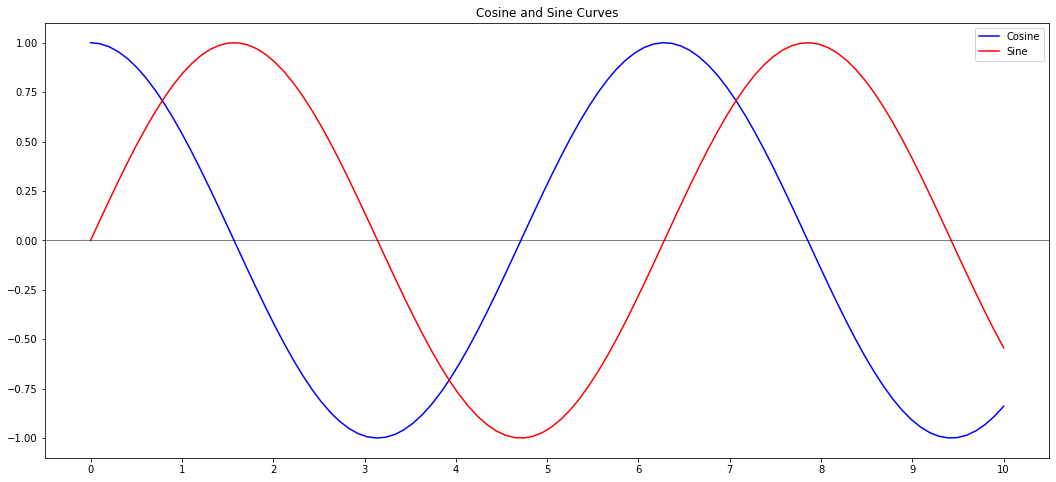

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Create data points for the domain [0, 10]
x = np.linspace(0, 10, 100)  # 100 points from 0 to 10
cosine = np.cos(x)
sine = np.sin(x)


# Create the figure and plot the curves
plt.figure(figsize=(18, 8))                           # Adjust the figure size as needed
plt.plot(x, cosine, label='Cosine', color='blue')    # Customize the color for the cosine curve
plt.plot(x, sine, label='Sine', color='red')         # Customize the color for the sine curve

# Add a horizontal line at y=0 (the x-axis)
plt.axhline(0, color='black', linewidth=0.5, linestyle='-')

# Add legend and title
plt.legend()
plt.title('Cosine and Sine Curves')

# Customize the x-axis labels
plt.xticks(np.arange(0, 11, 1))  # Set ticks at integer positions from 0 to 10

# Display the plot
plt.show()

#### Exercise 2.2
The Fibonacci sequence is a sequence wich each number is the sum of the two preceding ones and it is formally defined as:
    $$\begin{cases} 
    F_1=F_2=1 & \\ F_n =F_{n-1}+F_{n-2} & n>2
    \end{cases}$$
- Write a script that, given an input number $n$, computes the number $F_n$ of the Fibonacci sequence

In [31]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n + 1):
            a, b = b, a + b
        return b

In [41]:
fibonacci(10)

55

- Write a code computing, for a natural number $k$ the ratio $r_k=\frac{F_{k+1}}{F_k}$, where $F_k$ are the Fibonacci numbers.

In [32]:
def fibonacci_ratio(k):
    if k <= 0:
        return 0
    Fk = fibonacci(k)
    Fk_plus_1 = fibonacci(k + 1)
    return Fk_plus_1 / Fk

In [47]:
print(fibonacci_ratio(10000))
print(fibonacci_ratio(10))

1.618033988749895
1.6181818181818182


In [33]:
import math

k_values = list(range(1, 100))
ratios = [fibonacci_ratio(k) for k in k_values]

phi = (1 + math.sqrt(5)) / 2

# Calculate the error with respect to φ
errors = [abs(r - phi) for r in ratios]

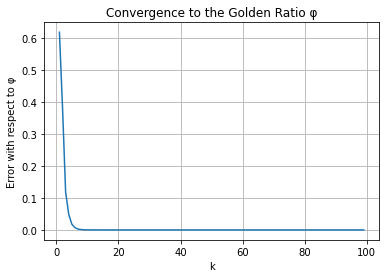

In [34]:
import matplotlib.pyplot as plt

plt.plot(k_values, errors)
plt.xlabel('k')
plt.ylabel('Error with respect to φ')
plt.title('Convergence to the Golden Ratio φ')
plt.grid()
plt.show()